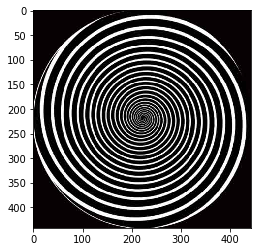

In [3]:
import skimage
import matplotlib.pyplot as plt
from skimage import io

img=io.imread('Hypnotic-spiral.jpg')
plt.imshow(img)

In [4]:
#Dimensionality reduction,Clustering and nearest neighbors of peptide reads
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('mhc_train.csv')
lines=list(df['sequence'])

In [15]:
#https://www.kaggle.com/thomasnelson/working-with-dna-sequence-data-for-ml

# function to convert a peptide sequence string to a numpy array

import numpy as np
import re
def string_to_array(my_string):
    my_string = my_string.lower()
    my_string = re.sub('[^arndcqeghilkmfpstwyvx]', 'z', my_string)
    my_array = np.array(list(my_string))
    return my_array

# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','r','n','d','c','q','e','g','h','i','l','k','m','f','p','s','t','w','y','v','x','z']))

def ordinal_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 1.25 # A
    float_encoded[float_encoded == 1] = 2.50 # R
    float_encoded[float_encoded == 2] = 3.75 # N
    float_encoded[float_encoded == 3] = 4.30 # D
    float_encoded[float_encoded == 4] = 5.45 # C
    float_encoded[float_encoded == 5] = 6.35 # Q
    float_encoded[float_encoded == 6] = 7.85 # E 
    float_encoded[float_encoded == 7] = 8.65 # G
    float_encoded[float_encoded == 8] = 9.95 # H
    float_encoded[float_encoded == 9] = 11.25 # I
    float_encoded[float_encoded == 10] = 12.55 # L
    float_encoded[float_encoded == 11] = 13.15 # K
    float_encoded[float_encoded == 12] = 14.11 # L
    float_encoded[float_encoded == 13] = 15.29 # K
    float_encoded[float_encoded == 14] = 16.39 # M
    float_encoded[float_encoded == 15] = 17.05 # F
    float_encoded[float_encoded == 16] = 18.09 # P
    float_encoded[float_encoded == 17] = 19.49 # S
    float_encoded[float_encoded == 18] = 20.79 # T
    float_encoded[float_encoded == 19] = 21.19 # W
    float_encoded[float_encoded == 20] = 22.55 # Y
    float_encoded[float_encoded == 21] = 23.95 # V
    float_encoded[float_encoded == 22] = 24.45 # X
    float_encoded[float_encoded == 10] = 0.0 # anything else z
    

    return float_encoded

X=[ordinal_encoder(string_to_array(i)) for i in lines]
X=np.array(X)
X

array([[ 1.25,  1.25,  3.75, ...,  8.65,  1.25, 16.39],
       [ 1.25,  1.25,  3.75, ...,  1.25,  1.25, 22.55],
       [ 1.25,  1.25,  3.75, ..., 18.09, 17.05, 22.55],
       ...,
       [22.55, 16.39, 22.55, ...,  1.25, 13.15,  5.45],
       [22.55, 16.39, 22.55, ..., 19.49, 12.55,  4.3 ],
       [12.55, 15.29, 11.25, ..., 20.79, 11.25, 11.25]])

In [16]:
#PCA for Kmeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)


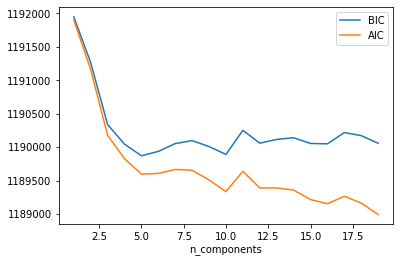

In [17]:
#Figuring out Optimal number of clusters from AIC and BIC


n_components = np.arange(1, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(principalComponents)
          for n in n_components]

plt.plot(n_components, [m.bic(principalComponents) for m in models], label='BIC')
plt.plot(n_components, [m.aic(principalComponents) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');


In [18]:
#Gaussian Mixture Modeling for clustering
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=42)

gmm.fit(principalComponents)
result = gmm.predict(principalComponents)

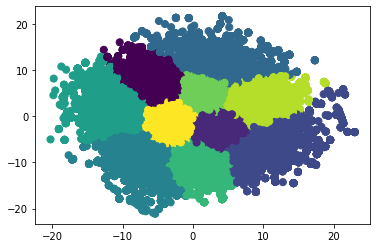

In [19]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=result, s=50, cmap='viridis')

In [20]:
#Nearest neighbors

from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3).fit(principalComponents)

In [21]:
distances, indices = nbrs.kneighbors(principalComponents)